In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Initialising the CNN
classifier = Sequential()

# Adding first Convolution layer. 
# It contains 32 feature detectors where every feature detector is a 3x3 matrix.
# In feature detector we use relu as activation function to convert negative values into zero.
classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Applying maxpooling. It will reduce half of the matrix size.
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolution layer. 
# It is not necessary to specify input shape of an input(here image) after specifying the shape in the first layer.
# Because our program already know about the shape that specified in the first layer.
classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# By applying Flatten here we are converting nxm matrix into a vector.
classifier.add(Flatten())

# Fully connected layer
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

#compiling CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [44]:
from keras.preprocessing.image import ImageDataGenerator
import time
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

# Preserving start time and end time to see how much time it takes to execute. 
start = time.time()

# Fitting the CNN to the images.
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('datasetmalefemale/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('datasetmalefemale/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

# Training the model using training set's data and testing the model using testing set's data.
classifier.fit_generator(training_set,
                         steps_per_epoch = 813,
                         epochs = 2,
                         validation_data = test_set,
                         validation_steps = 299)

end = time.time()

Found 1626 images belonging to 2 classes.
Found 598 images belonging to 2 classes.
Epoch 1/2
813/813 [==============================] - 279s 343ms/step - loss: 0.1401 - accuracy: 0.9467 - val_loss: 0.9649 - val_accuracy: 0.8577
Epoch 2/2
813/813 [==============================] - 334s 411ms/step - loss: 0.0598 - accuracy: 0.9788 - val_loss: 0.2354 - val_accuracy: 0.8759


In [79]:
# Defining a function for predicting single photos.
def SinglePrediction(test_image):
    # Converting image into a 3D matrix
    matrix = image.img_to_array(test_image)
    # Since out model requires 4D matrix, so adding a new dimention.
    matrix_3d_to_4d = np.expand_dims(matrix, axis = 0)

    # Predicting and preserving the result
    prediction = classifier.predict(matrix_3d_to_4d)

    # From [training_set.class_indices] we know the class indices.
    # Determining our prediction is male or female based on class indices.
    if prediction[0][0] == 1:
        print('prediction : Male')
    else:
        print('prediction : Female')

prediction : Female


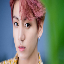

In [80]:
test_image_1 = image.load_img('datasetmalefemale/single_prediction/male_or_female3.png', target_size = (64, 64))
SinglePrediction(test_image_1)
test_image_1

prediction : Male


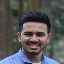

In [81]:
test_image_2 = image.load_img('datasetmalefemale/single_prediction/male_or_female_0.jpg', target_size = (64, 64))
SinglePrediction(test_image_2)
test_image_2